### Read in data

In [194]:
import pandas as pd
df = pd.read_csv("../data/data.csv")

### Isolate occupation and occupation code

In [195]:
occupation = df[["OCCUPATION_CODE", "OCCUPATION_DESC1"]]

In [196]:
occupation.isna().sum()

OCCUPATION_CODE     15194
OCCUPATION_DESC1     6127
dtype: int64

In [198]:
occupation["OCCUPATION_DESC1"].head(50)


0                                 MECHANIC
1                                  TEACHER
2                                    CLERK
3                        CREDIT CONTROLLER
4               SECURITY OFFICER/ WATCHMAN
5                     SKILLED/SEMI-SKILLED
6                     SWITCHBOARD OPERATOR
7                ASSISTANT GENERAL MANAGER
8                            SOCIAL WORKER
9                                 LABOURER
10                SALESMAN/SALESLADY:OTHER
11              SECURITY OFFICER/ WATCHMAN
12                                DIRECTOR
13                                 TEACHER
14                 ASSISTANT ADMIN.OFFICER
15                                 TEACHER
16                                     NaN
17              SECURITY OFFICER/ WATCHMAN
18                                 TEACHER
19                         FIELD ASSISTANT
20            OPERATOR:OTHER THAN COMPUTER
21                    SKILLED/SEMI-SKILLED
22                                 TEACHER
23         

In [119]:
occupation = occupation.copy()
occupation["OCCUPATION_DESC1"] = (
    occupation["OCCUPATION_DESC1"]
    .str.lower()
    .str.replace(r'[^\w\s]', ' ', regex=True)  # keep only letters, numbers, and spaces
)

In [120]:
import pandas as pd

# Step 1: Compute the most frequent code per description
most_freq_codes = (
    occupation[occupation["OCCUPATION_CODE"].notna()]  # filter out missing codes
    .groupby(["OCCUPATION_DESC1", "OCCUPATION_CODE"])
    .size()  # count occurrences
    .reset_index(name="freq")
    .sort_values(["OCCUPATION_DESC1", "freq"], ascending=[True, False])
    .drop_duplicates(subset=["OCCUPATION_DESC1"], keep="first")[["OCCUPATION_DESC1", "OCCUPATION_CODE"]]
)

# Step 2: Fill missing codes with the most frequent code
df_filled = occupation.merge(
    most_freq_codes, 
    on="OCCUPATION_DESC1", 
    how="left", 
    suffixes=("", "_mostfreq")
)

df_filled["OCCUPATION_CODE"] = df_filled["OCCUPATION_CODE"].fillna(df_filled["OCCUPATION_CODE_mostfreq"])

# Keep only the columns we care about
occupation = df_filled[["OCCUPATION_CODE", "OCCUPATION_DESC1"]]


In [121]:
occupation.isna().sum()

OCCUPATION_CODE     11134
OCCUPATION_DESC1     6127
dtype: int64

In [122]:
import pandas as pd

# Step 1: Compute most frequent description per code
most_freq_desc = (
    occupation[occupation["OCCUPATION_DESC1"].notna()]  # filter out missing descriptions
    .groupby(["OCCUPATION_CODE", "OCCUPATION_DESC1"])
    .size()  # count occurrences
    .reset_index(name="freq")
    .sort_values(["OCCUPATION_CODE", "freq"], ascending=[True, False])
    .drop_duplicates(subset=["OCCUPATION_CODE"], keep="first")[["OCCUPATION_CODE", "OCCUPATION_DESC1"]]
)

# Step 2: Fill missing descriptions
df_filled_desc = occupation.merge(
    most_freq_desc,
    on="OCCUPATION_CODE",
    how="left",
    suffixes=("", "_mostfreq")
)

df_filled_desc["OCCUPATION_DESC1"] = df_filled_desc["OCCUPATION_DESC1"].fillna(df_filled_desc["OCCUPATION_DESC1_mostfreq"])

# Keep only the desired columns
occupation = df_filled_desc[["OCCUPATION_CODE", "OCCUPATION_DESC1"]]


In [123]:
occupation.isna().sum()

OCCUPATION_CODE     11134
OCCUPATION_DESC1      447
dtype: int64

In [124]:
len(occupation["OCCUPATION_DESC1"].unique())

2392

In [125]:
occupation["OCCUPATION_DESC1"].head(50)

0                                       mechanic
1                                        teacher
2                                          clerk
3                              credit controller
4                     security officer  watchman
5                           skilled semi skilled
6                           switchboard operator
7                      assistant general manager
8                                  social worker
9                                       labourer
10                      salesman saleslady other
11                    security officer  watchman
12                                      director
13                                       teacher
14                       assistant admin officer
15                                       teacher
16    administration officer  manager  assistant
17                    security officer  watchman
18                                       teacher
19                               field assistant
20                  

In [126]:
from spellchecker import SpellChecker
import pandas as pd
from tqdm import tqdm  # progress bar

spell = SpellChecker()

def fix_text(text):
    if pd.isna(text):
        return text
    # Remove anything after '/' or ':'
    text = text.split('/')[0].split(':')[0].strip()
    words = text.split()
    corrected_words = []
    for w in words:
        corrected = spell.correction(w)
        if corrected is None:
            print(f"Unrecognized word: {w}")  # print original word if no correction
            corrected = w
        corrected_words.append(corrected)
    return ' '.join(corrected_words).lower()  # also lowercase

# Extract unique occupations
unique_occupations = occupation['OCCUPATION_DESC1'].dropna().unique()
print(f"Number of unique occupations: {len(unique_occupations)}")

# Clean with progress bar
unique_occupations_cleaned = [fix_text(x) for x in tqdm(unique_occupations, desc="Cleaning unique occupations")]

# Create mapping to apply to full column
cleaning_map = dict(zip(unique_occupations, unique_occupations_cleaned))
occupation['OCCUPATION_DESC1_clean'] = occupation['OCCUPATION_DESC1'].map(cleaning_map)

# Preview results
print(occupation[['OCCUPATION_DESC1', 'OCCUPATION_DESC1_clean']].head(10))


Number of unique occupations: 2391


Cleaning unique occupations:   3%|▎         | 61/2391 [00:00<00:18, 124.52it/s]

Unrecognized word: bottlestore


Cleaning unique occupations:   6%|▌         | 148/2391 [00:00<00:12, 178.25it/s]

Unrecognized word: panelbeater


Cleaning unique occupations:  12%|█▏        | 277/2391 [00:01<00:10, 209.86it/s]

Unrecognized word: debswana


Cleaning unique occupations:  13%|█▎        | 299/2391 [00:01<00:16, 125.18it/s]

Unrecognized word: nightwatch


Cleaning unique occupations:  14%|█▍        | 343/2391 [00:02<00:23, 87.53it/s] 

Unrecognized word: groundslady


Cleaning unique occupations:  16%|█▋        | 393/2391 [00:04<00:51, 38.60it/s]

Unrecognized word: ramotswa


Cleaning unique occupations:  22%|██▏       | 520/2391 [00:06<00:36, 50.58it/s]

Unrecognized word: letlhakane


Cleaning unique occupations:  27%|██▋       | 637/2391 [00:07<00:39, 44.33it/s]

Unrecognized word: procurementofficer


Cleaning unique occupations:  32%|███▏      | 774/2391 [00:10<00:41, 39.08it/s]

Unrecognized word: businessdevelopment


Cleaning unique occupations:  33%|███▎      | 782/2391 [00:11<00:47, 34.23it/s]

Unrecognized word: draughtsman


Cleaning unique occupations:  34%|███▍      | 821/2391 [00:11<00:38, 41.14it/s]

Unrecognized word: hydrogeologist


Cleaning unique occupations:  35%|███▌      | 847/2391 [00:12<00:29, 52.09it/s]

Unrecognized word: crewboss


Cleaning unique occupations:  41%|████▏     | 989/2391 [00:12<00:09, 147.57it/s]

Unrecognized word: wellfair


Cleaning unique occupations:  44%|████▍     | 1063/2391 [00:14<00:20, 65.56it/s] 

Unrecognized word: assistastant


Cleaning unique occupations:  48%|████▊     | 1158/2391 [00:14<00:11, 110.16it/s]

Unrecognized word: morupule


Cleaning unique occupations:  55%|█████▌    | 1324/2391 [00:16<00:11, 95.39it/s] 

Unrecognized word: groundlady


Cleaning unique occupations:  56%|█████▌    | 1340/2391 [00:16<00:13, 79.14it/s]

Unrecognized word: machineman


Cleaning unique occupations:  64%|██████▎   | 1524/2391 [00:19<00:12, 71.12it/s] 

Unrecognized word: heradboy


Cleaning unique occupations:  65%|██████▌   | 1559/2391 [00:19<00:10, 82.77it/s]

Unrecognized word: letshego


Cleaning unique occupations:  66%|██████▌   | 1576/2391 [00:20<00:19, 40.87it/s]

Unrecognized word: accountscontroller


Cleaning unique occupations:  67%|██████▋   | 1599/2391 [00:21<00:24, 31.91it/s]

Unrecognized word: pharmacotherapist


Cleaning unique occupations:  73%|███████▎  | 1740/2391 [00:22<00:07, 88.33it/s] 

Unrecognized word: pipefitter


Cleaning unique occupations:  84%|████████▎ | 1999/2391 [00:25<00:04, 89.19it/s] 

Unrecognized word: supretendan


Cleaning unique occupations:  89%|████████▉ | 2136/2391 [00:27<00:04, 63.19it/s] 

Unrecognized word: machendezer


Cleaning unique occupations:  91%|█████████ | 2172/2391 [00:27<00:02, 82.48it/s]

Unrecognized word: crewboss


Cleaning unique occupations:  94%|█████████▍| 2255/2391 [00:28<00:01, 122.84it/s]

Unrecognized word: debswana


Cleaning unique occupations:  96%|█████████▌| 2299/2391 [00:29<00:01, 64.48it/s] 

Unrecognized word: laundrylady


Cleaning unique occupations: 100%|██████████| 2391/2391 [00:29<00:00, 79.88it/s] 

             OCCUPATION_DESC1     OCCUPATION_DESC1_clean
0                    mechanic                   mechanic
1                     teacher                    teacher
2                       clerk                      clerk
3           credit controller          credit controller
4  security officer  watchman  security officer watchman
5        skilled semi skilled       skilled semi skilled
6        switchboard operator       switchboard operator
7   assistant general manager  assistant general manager
8               social worker              social worker
9                    labourer                    laborer


In [127]:
# Manual mapping for unrecognized / custom occupations
manual_map = {
    "bottlestore": "alchol retailer",
    "panelbeater": "panel beater",
    "debswana": "mining", # de beers botswana
    "nightwatch": "night watchman",
    "groundslady": "grounds lady",
    "ramotswa": "unknown", # a village in bots
    "procurementofficer": "procurement officer",
    "businessdevelopment": "business development",
    "draughtsman": "draughtsman",
    "hydrogeologist": "hydro geologist",
    "crewboss": "crew boss",
    "wellfair": "welfare",
    "assistastant": "assistant",
    "morupule": "mining", # coal mine in bots
    "groundlady": "ground lady",
    "machineman": "machine man",
    "heradboy": "herald boy",
    "letshego": "finance", # letshego is a bots finance company
    "accountscontroller": "accounts controller",
    "pharmacotherapist": "pharma cotherapist",
    "pipefitter": "pipe fitter",
    "supretendan": "superintendent",
    "machendezer": "merchandiser",
    "laundrylady": "laundry lady",
    ### things i am adding cause i feel like it 
    "skilled semi skilled": "skilled worker",
    "waist packer": "waste packer"
}

# Apply this mapping on top of the previous cleaned column
occupation['OCCUPATION_DESC1_clean'] = occupation['OCCUPATION_DESC1_clean'].replace(manual_map)

# Preview results
print(occupation[['OCCUPATION_DESC1', 'OCCUPATION_DESC1_clean']].head(1000))


                OCCUPATION_DESC1       OCCUPATION_DESC1_clean
0                       mechanic                     mechanic
1                        teacher                      teacher
2                          clerk                        clerk
3              credit controller            credit controller
4     security officer  watchman    security officer watchman
..                           ...                          ...
995                      cleaner                      cleaner
996        professional clerical        professional clerical
997  driver other than chauffeur  driver other than chauffeur
998                      teacher                      teacher
999                      teacher                      teacher

[1000 rows x 2 columns]


In [142]:
len(occupation["OCCUPATION_DESC1"].unique())

2392

In [128]:
# List of generic "role" words
generic_words = {
    "worker","assistant","officer","staff","personnel","manager","director",
    "supervisor","administrator","registrar","practitioner","controller",
    "operator","keeper","hand","attendant","clerk","cashier","secretary",
    "receptionist","messenger","guard","soldier","watchman","orderly",
    "sister","teacher","educator","minor","unknown"
}

def preprocess_occupation(title: str) -> str:
    if pd.isna(title): 
        return title
    
    words = title.lower().split()
    
    # if it's a single word, keep it as is
    if len(words) == 1:
        return title.lower().strip()
    
    # otherwise remove generic words
    cleaned = [w for w in words if w not in generic_words]
    
    # if everything got removed, fall back to original
    if not cleaned:
        return title.lower().strip()
    
    return " ".join(cleaned).strip()

# Apply to dataset
occupation["OCCUPATION_DESC1_clean"] = occupation["OCCUPATION_DESC1_clean"].apply(preprocess_occupation)


In [130]:
len(occupation["OCCUPATION_DESC1_clean"].unique())

1758

In [175]:
import umap.umap_ as umap
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
unique_occupations_clean = occupation['OCCUPATION_DESC1_clean'].dropna().unique()
embeddings = model.encode(unique_occupations_clean)

reducer = umap.UMAP(
    n_neighbors=15,      # preserves local structure
    n_components=5,      # for clustering; use 2 if for visualization only
    metric='cosine',     # correct for embeddings
    random_state=42,
)
embeddings_reduced = reducer.fit_transform(embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


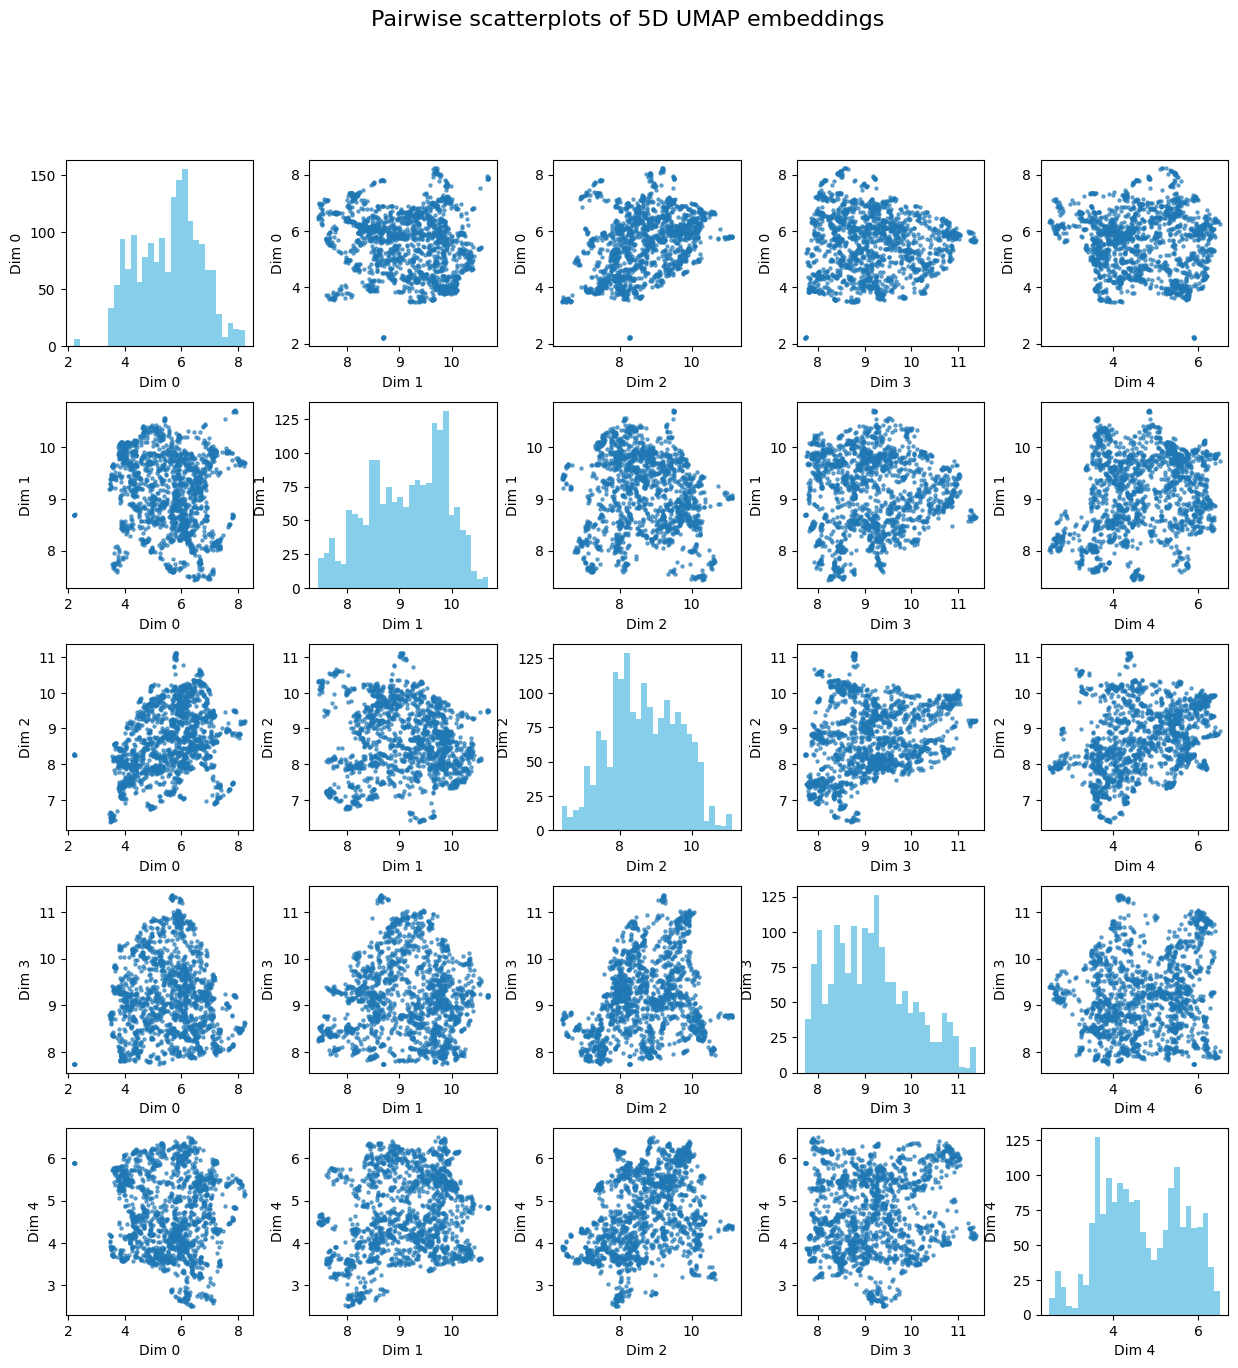

In [177]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

# embeddings_reduced.shape = (n_samples, 5)
n_components = embeddings_reduced.shape[1]

fig, axes = plt.subplots(n_components, n_components, figsize=(15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(n_components):
    for j in range(n_components):
        ax = axes[i, j]
        if i == j:
            # Diagonal: maybe show histogram
            ax.hist(embeddings_reduced[:, i], bins=30, color='skyblue')
            ax.set_ylabel(f"Dim {i}")
            ax.set_xlabel(f"Dim {j}")
        else:
            # Scatter off-diagonal
            ax.scatter(embeddings_reduced[:, j], embeddings_reduced[:, i], s=5, alpha=0.6)
            ax.set_xlabel(f"Dim {j}")
            ax.set_ylabel(f"Dim {i}")

plt.suptitle("Pairwise scatterplots of 5D UMAP embeddings", fontsize=16)
plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered 

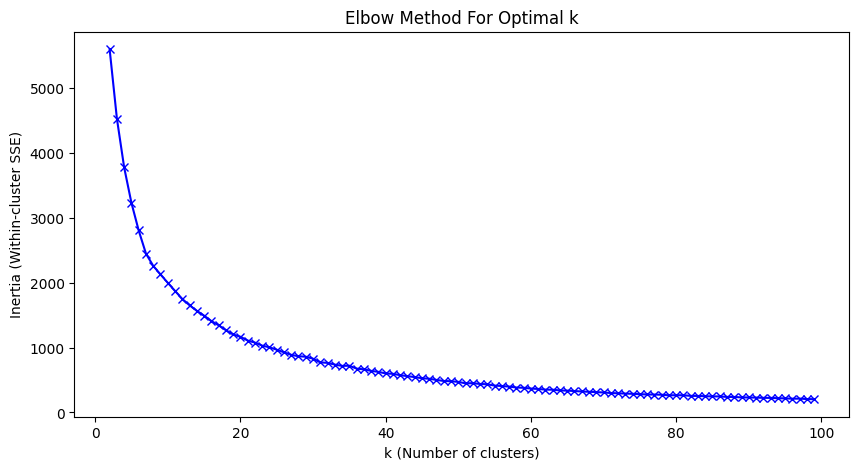

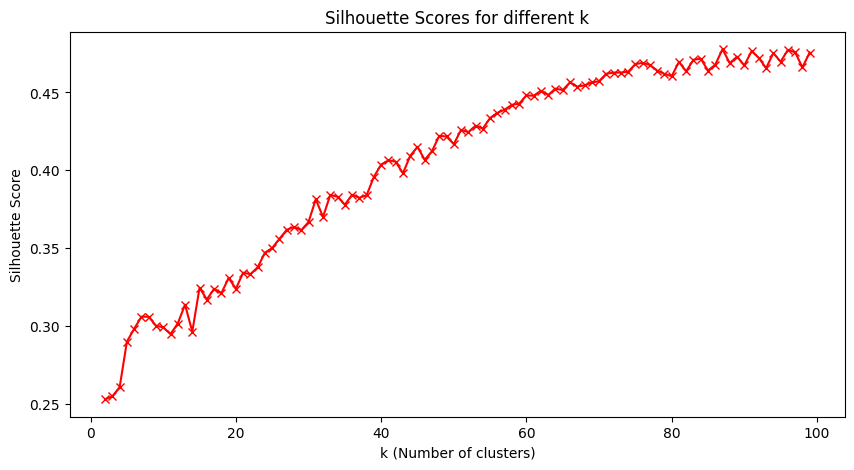

In [178]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different values of k
inertia = []
sil_scores = []
K = range(2, 100)  # test from 2 to 40 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embeddings_reduced)
    inertia.append(kmeans.inertia_)  # sum of squared distances
    sil_scores.append(silhouette_score(embeddings_reduced, kmeans.labels_))

# Plot elbow curve (inertia)
plt.figure(figsize=(10,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10,5))
plt.plot(K, sil_scores, 'rx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.show()


In [188]:

# -----------------------------
# 6. Cluster with KMeans
# -----------------------------
num_clusters = 20  # choose how many clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_reduced)

# -----------------------------
# 7. Map clusters back to unique occupations
# -----------------------------
occupation_cluster_map = pd.DataFrame({
    "OCCUPATION_DESC1_clean": unique_occupations_clean,
    "cluster": clusters
})

# Merge back to full dataset
if "cluster" in occupation.columns:
    occupation = occupation.drop(columns=["cluster"])

occupation = occupation.merge(
    occupation_cluster_map, 
    on="OCCUPATION_DESC1_clean", 
    how="left"
)


# -----------------------------
# 8. Inspect clusters
# -----------------------------
# Number of clusters
print(f"Number of clusters: {len(set(clusters))}")

# Words per cluster
clustered_words = occupation_cluster_map.groupby("cluster")["OCCUPATION_DESC1_clean"].apply(list)
cluster_sizes = occupation_cluster_map.groupby("cluster").size()
print("\nCluster sizes:")
print(cluster_sizes)

# Show top 10 occupations per cluster
for cluster_id, words in clustered_words.items():
    print(f"\nCluster {cluster_id} ({len(words)} occupations):")
    print(words[:10])

Number of clusters: 20

Cluster sizes:
cluster
0      91
1     101
2      69
3     105
4      93
5     100
6      43
7      73
8     104
9      84
10     82
11     65
12     88
13     62
14    109
15    122
16     86
17     69
18     84
19    127
dtype: int64

Cluster 0 (91 occupations):
['salesman saleslady other', 'store', 'shopkeeper not bottlestore', 'cashier', 'stock', 'marketing', 'storekeeper', 'store shop owner', 'salesman saleslady travelling', 'sales']

Cluster 1 (101 occupations):
['headman chief sub chief', 'typist', 'chief', 'principal technical', 'senior administration', 'leading', 'registrar assistant registrar', 'student', 'standard', 'district']

Cluster 2 (69 occupations):
['driver other than chauffeur', 'fireman', 'fire', 'driver debswana', 'engine diver', 'light duty driver', 'engine man', 'blaster blasting licence holder', 'truck', 'locomotive driver mainline in botswana railway']

Cluster 3 (105 occupations):
['general', 'director', 'administration', 'armed force'

/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


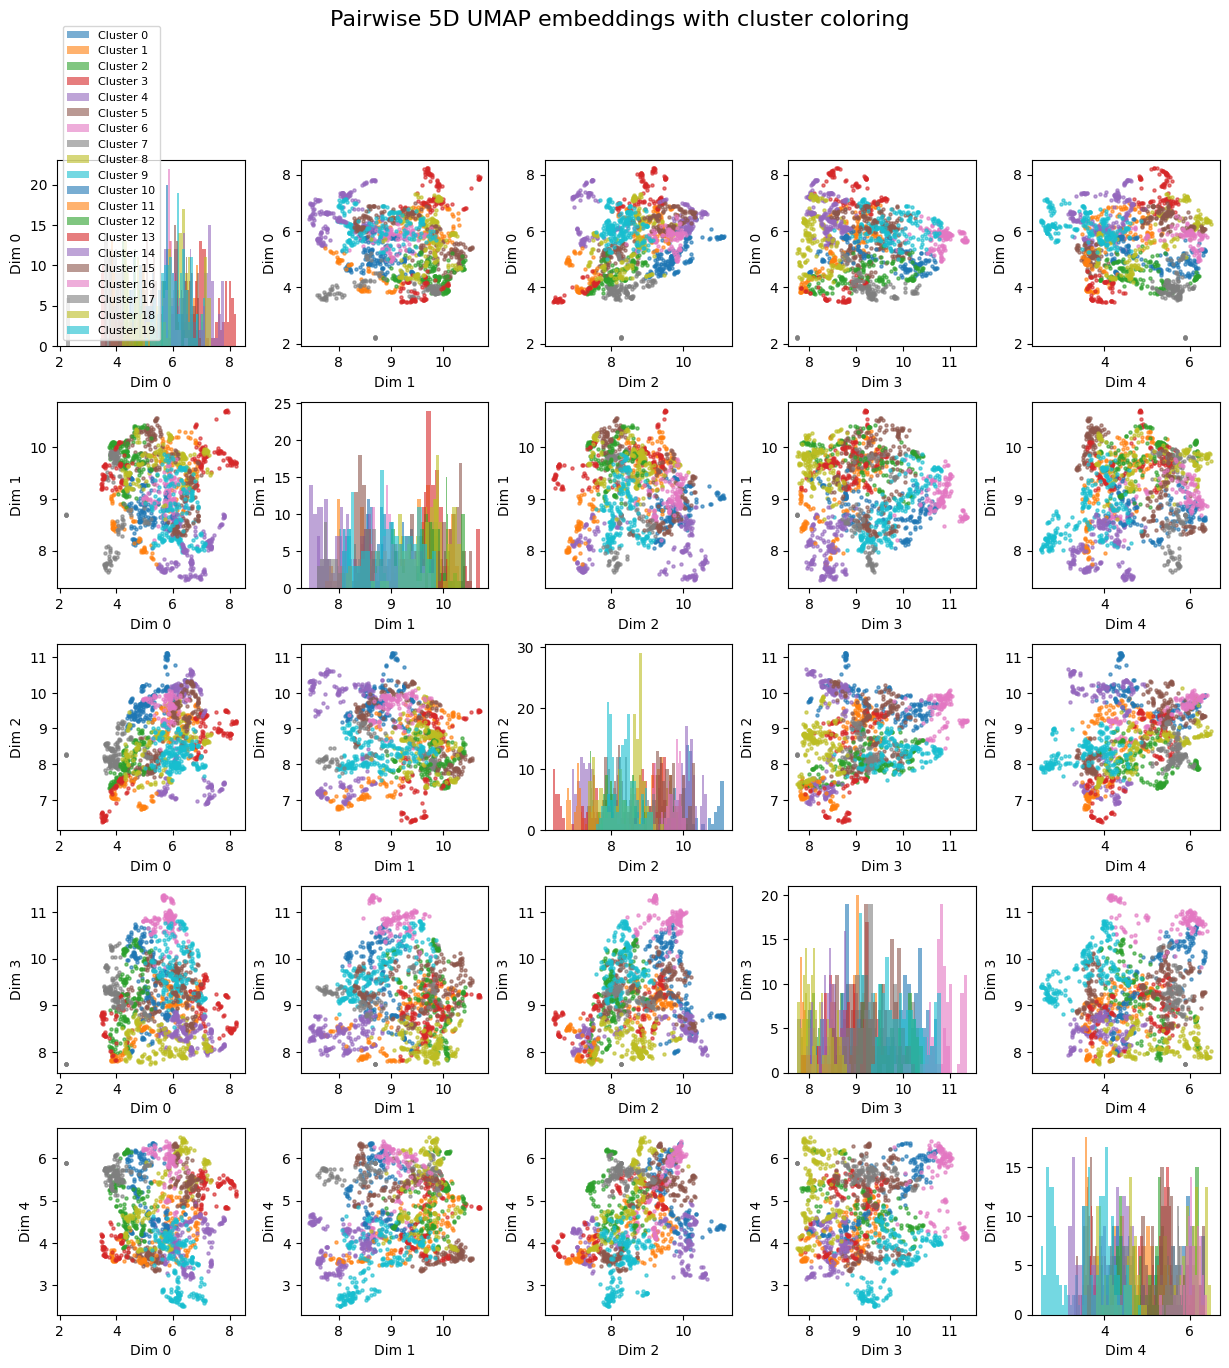

In [189]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose:
# embeddings_reduced.shape = (n_samples, 5)
# clusters = array of KMeans/HDBSCAN cluster labels for each point

n_components = embeddings_reduced.shape[1]

fig, axes = plt.subplots(n_components, n_components, figsize=(15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(n_components):
    for j in range(n_components):
        ax = axes[i, j]
        if i == j:
            # Diagonal: histogram colored by cluster
            for c in np.unique(clusters):
                ax.hist(
                    embeddings_reduced[clusters==c, i],
                    bins=20, alpha=0.6, label=f"Cluster {c}"
                )
            if i == 0:
                ax.legend(fontsize=8)
            ax.set_xlabel(f"Dim {j}")
            ax.set_ylabel(f"Dim {i}")
        else:
            # Off-diagonal: scatter plot colored by cluster
            for c in np.unique(clusters):
                ax.scatter(
                    embeddings_reduced[clusters==c, j],
                    embeddings_reduced[clusters==c, i],
                    s=5, alpha=0.6, label=f"Cluster {c}" if i==0 and j==1 else ""
                )
            ax.set_xlabel(f"Dim {j}")
            ax.set_ylabel(f"Dim {i}")

plt.suptitle("Pairwise 5D UMAP embeddings with cluster coloring", fontsize=16)
plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/mva/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


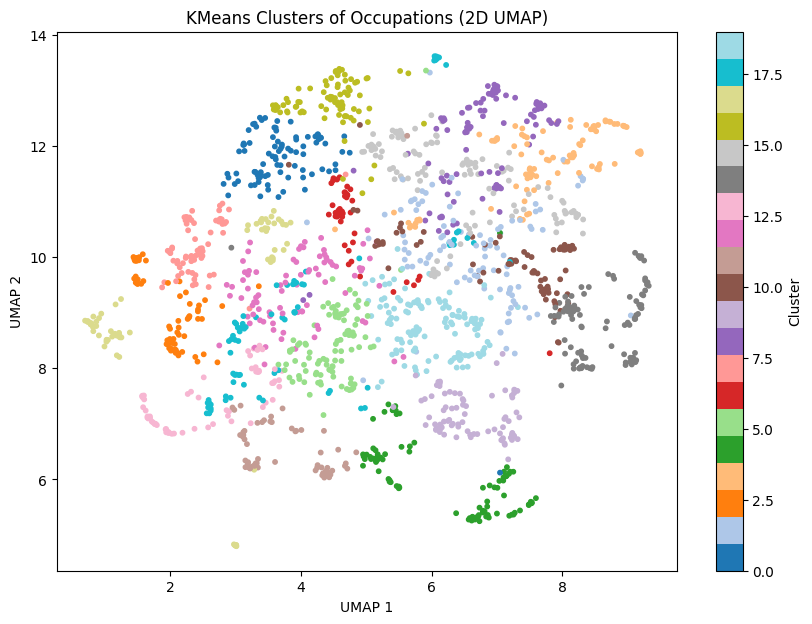

In [190]:
import umap.umap_ as umap

# 2D projection for visualization
reducer_2d = umap.UMAP(
    n_neighbors=15,      # preserves local structure
    n_components=2,      # for clustering; use 2 if for visualization only
    metric='cosine',     # correct for embeddings
    random_state=42,
)
embeddings_2d = reducer_2d.fit_transform(embeddings)  # embeddings = original SentenceTransformer embeddings

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
scatter = plt.scatter(
    embeddings_2d[:,0], embeddings_2d[:,1], 
    c=clusters, cmap='tab20', s=10
)
plt.title("KMeans Clusters of Occupations (2D UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.show()



In [191]:
cluster_sector_map = {
    0:  "Retail / Sales / Marketing",
    1:  "Skilled Trades & Manual Labor",
    2:  "Public Administration / Welfare / Social Services",
    3:  "Agriculture / Horticulture / Environment",
    4:  "Transport / Driving / Logistics / Firefighting",
    5:  "Medical / Dental / Health Professions / Media",
    6:  "Administration / Clerical / Government Services",
    7:  "Security / Law Enforcement / Compliance",
    8:  "Planning / Economics / Urban Development",
    9:  "Mining / Diamonds / Food Processing / Field Work",
    10: "Engineering / Mechanical / Plumbing / Utilities",
    11: "Technical Professions / Education / Skilled Work",
    12: "Wildlife / Veterinary / Correctional Services",
    13: "Nursing / Hospital Care / Healthcare Support",
    14: "Information Technology / Computers / Systems",
    15: "Finance / Banking / Accounting / Auditing",
    16: "Sales / Consulting / Customer Services",
    17: "Management / Administration / Office Roles",
    18: "Hospitality / Food Services / Domestic Work",
    19: "Military / Police / Religious Services / Justice"
}


# Map clusters to sectors, fallback to "Other" if cluster not in mapping
occupation["sector"] = occupation["cluster"].map(cluster_sector_map).fillna("Other")


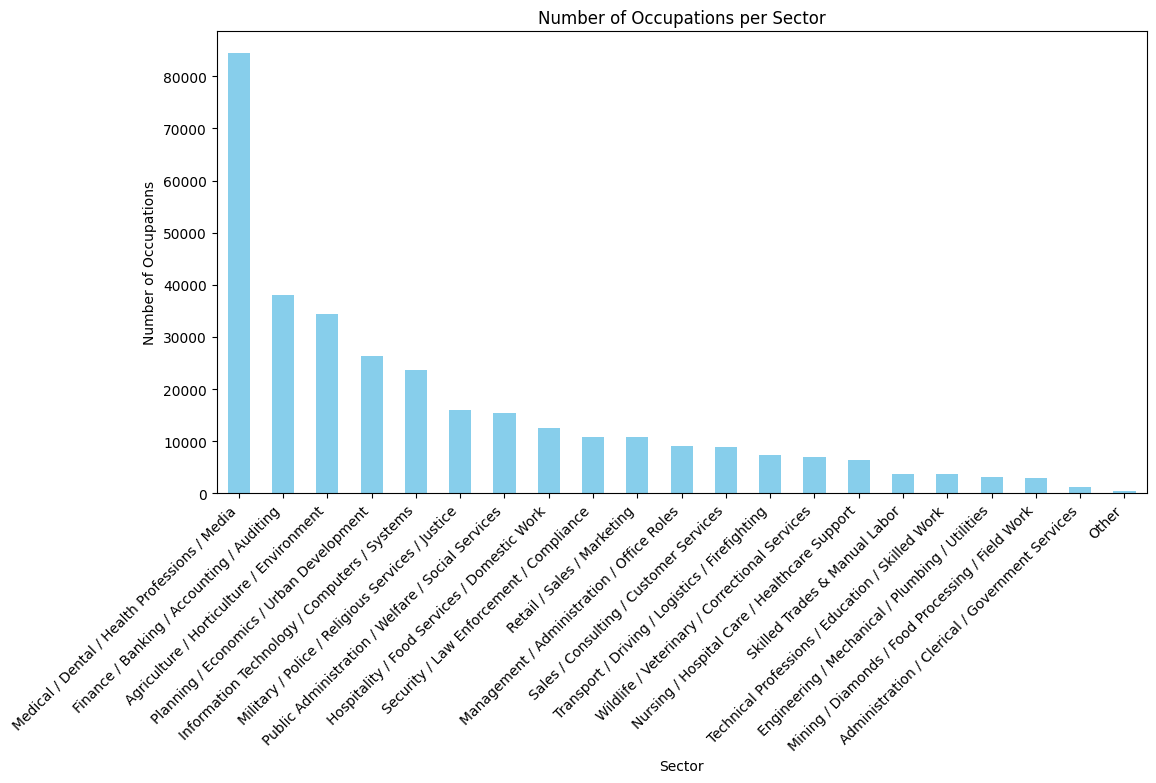

In [192]:
import matplotlib.pyplot as plt

# Count occupations per sector
sector_counts = occupation["sector"].value_counts()

# Plot histogram
plt.figure(figsize=(12,6))
sector_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Sector")
plt.ylabel("Number of Occupations")
plt.title("Number of Occupations per Sector")
plt.xticks(rotation=45, ha='right')
plt.show()


In [193]:
# import pandas as pd
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
# from tqdm import tqdm  # progress bar

# # Example dataframe
# # occupation = pd.DataFrame({'OCCUPATION_DESC1': [...your data...]})

# # Load a small instruction-tuned model
# model_name = "google/flan-t5-large"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# # Create a text2text pipeline
# cleaner = pipeline(
#     "text2text-generation", model=model, tokenizer=tokenizer, device=-1, max_new_tokens=32
# )  # use GPU if available


# # Function to clean and correct a single occupation
# def clean_occupation(text):
#     if pd.isna(text):
#         return text
#     prompt = (
#         "Convert occupation descriptions to a single short standard term without losing the meaning of the occupation, lowercase:\n"
#         "teacher assistant -> teacher assistant\n"
#         "salesman saleslady other -> salesman\n"
#         "supplies officer -> supplies officer\n"
#         "credit controller -> credit controller\n"
#         "quality controller -> quality controller\n"
#         "skilled semi skilled -> skilled worker\n"
#         "nursing matrons or sisters and qualified nurse -> nurse\n"
#         "assistant general manager -> assistant general manager\n"
#         "head teacher -> teacher\n"
#         "nurse orderly assistant -> nurse orderly assistant\n"
#         "salesman saleslady travelling -> salesman saleslady\n"
#         "computer system analyst scientist engineer -> scientist\n"
#         "night watchman -> watchman\n"
#         "fire officer -> fire officer\n"
#         "store keeper shop owner -> shop owner\n"
#         "technical officer building -> technical officer\n"
#         "plant operator assistant -> plant operator\n"
#         "personal assistant -> personal assistant\n"
#         "accounts clerk -> accounts clerk\n"
#         "school principal -> school principal\n"

#         f"{text} ->"
#     )

#     output = cleaner(prompt, max_new_tokens=32, do_sample=False)
#     cleaned_text = output[0]["generated_text"].strip()
#     print(f"Input: {text}  -->  Output: {cleaned_text}")  # print each mapping
#     return cleaned_text


# # Extract unique occupation descriptions
# unique_occupations = occupation["OCCUPATION_DESC1_clean"].dropna().unique()
# print(f"Number of unique occupations: {len(unique_occupations)}")

# # Clean unique occupations with a progress bar
# unique_cleaned = []
# for occ in tqdm(unique_occupations, desc="Cleaning unique occupations"):
#     unique_cleaned.append(clean_occupation(occ))

# # Create mapping from original -> cleaned
# cleaning_map = dict(zip(unique_occupations, unique_cleaned))

# # Apply mapping to the full dataframe
# occupation["OCCUPATION_DESC1_clean_llm"] = occupation["OCCUPATION_DESC1_clean"].map(
#     cleaning_map
# )

# # Preview results
# print(occupation[["OCCUPATION_DESC1_clean", "OCCUPATION_DESC1_clean_llm"]].head(10))